<a href="https://colab.research.google.com/github/linheri06/the_text_recognition1/blob/main/0h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install neuralforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from neuralforecast.utils import AirPassengersDF

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


      unique_id         ds       y
0             1 2017-01-01  245.25
1             1 2017-01-02   87.29
2             1 2017-01-03   72.37
3             1 2017-01-04   63.54
4             1 2017-01-05   55.36
...         ...        ...     ...
2186          1 2022-12-27  128.08
2187          1 2022-12-28  112.86
2188          1 2022-12-29  143.29
2189          1 2022-12-30  129.15
2190          1 2022-12-31  128.06

[2191 rows x 3 columns]
      unique_id         ds        y
0             1 2017-01-01   245.25
1             1 2017-01-02    87.29
2             1 2017-01-03    72.37
3             1 2017-01-04    63.54
4             1 2017-01-05    55.36
...         ...        ...      ...
1747          1 2021-10-14    95.17
1748          1 2021-10-15    80.59
1749          1 2021-10-16   233.99
1750          1 2021-10-17  1465.12
1751          1 2021-10-18   663.96

[1752 rows x 3 columns]
      unique_id         ds       y
1752          1 2021-10-19  231.72
1753          1 2021-10-20  

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

                  ds      NBEATS       NHITS
unique_id                                   
1         2021-10-19   21.050110 -132.595825
1         2021-10-20  707.121765  -73.564629
1         2021-10-21  655.492004  108.353661
1         2021-10-22  636.852539  322.919434
1         2021-10-23  713.152222  482.174377
...              ...         ...         ...
1         2022-12-27  629.138306  618.887634
1         2022-12-28  555.319092  644.428284
1         2022-12-29  623.166565  659.579407
1         2022-12-30  609.152588  662.390015
1         2022-12-31  659.685791  664.874451

[439 rows x 3 columns]


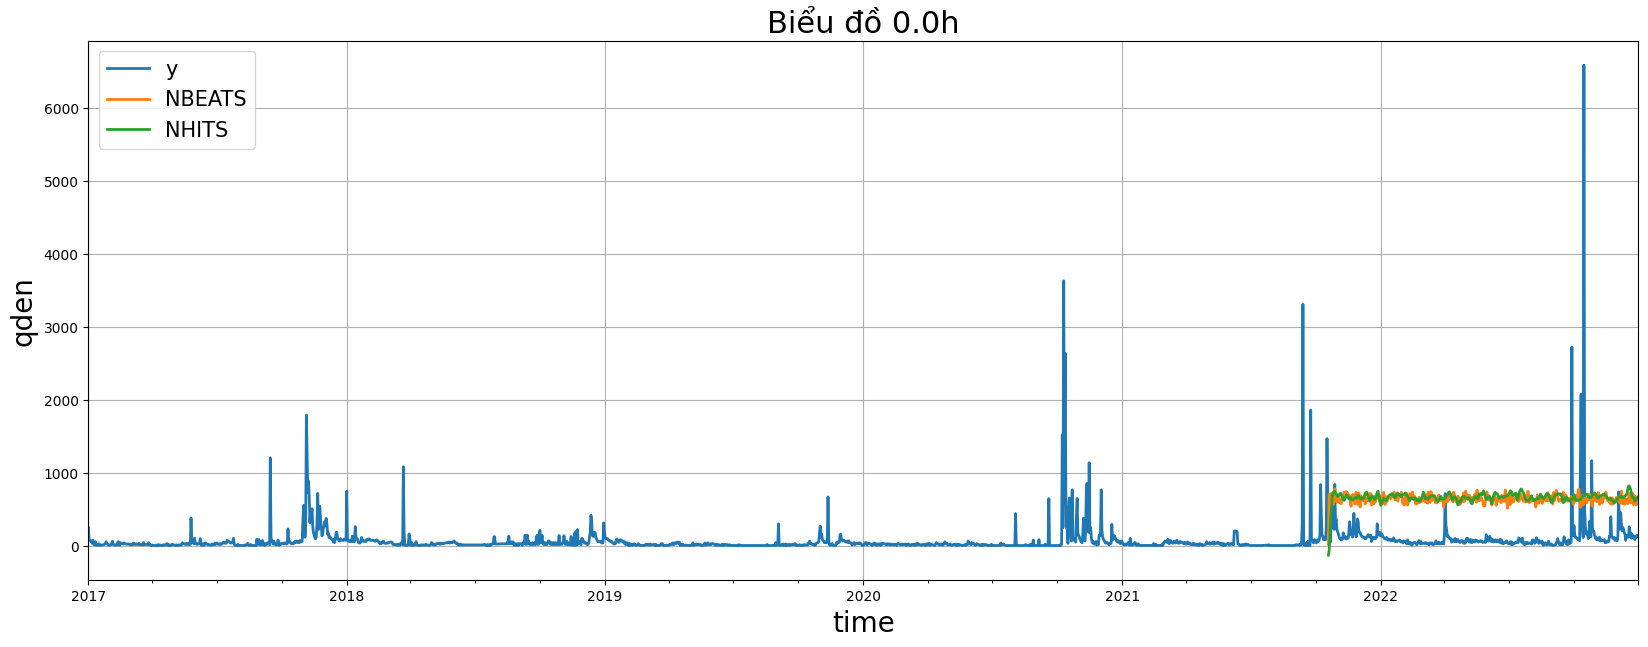

In [15]:
#0.0h
df = pd.read_csv("dataset/file_0.csv")
# Chuyển đổi cột 'year' thành kiểu datetime
df['year'] = pd.to_datetime(df['year'], format='%m/%d/%y %H:%M')

df = df[['year', 'qden']]

df ['unique_id'] = 1
df = df.rename(columns={'year': 'ds', 'qden': 'y'})
df = df[['unique_id', 'ds', 'y']]
print(df)

# Chia dữ liệu thành tập huấn luyện (70%) và tập kiểm tra (30%)
train_df, test_df = train_test_split(df, test_size=0.2, shuffle= False)
print(train_df)
print(test_df)
horizon = len(test_df)

models = [NBEATS(input_size= len(train_df)-1, h=horizon, max_steps=200),
          NHITS(input_size=len(train_df)-1, h=horizon, max_steps=200)]

nf1 = NeuralForecast(models=models, freq='D')

nf1.fit(df=train_df)

predictions = nf1.predict()
print(predictions)
# Vẽ biểu đồ dự đoán
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
predictions = test_df.merge(predictions, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([train_df, predictions]).set_index('ds')

plot_df[['y', 'NBEATS', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('Biểu đồ 0.0h', fontsize=22)
ax.set_ylabel('qden', fontsize=20)
ax.set_xlabel('time', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [16]:
from sklearn.metrics import r2_score
print(r2_score(predictions['y'], predictions['NHITS']))
print(r2_score(predictions['y'], predictions['NBEATS']))
print(predictions)


-2.163681508736785
-2.021461535474193
     unique_id         ds       y      NBEATS       NHITS
0            1 2021-10-19  231.72   21.050110 -132.595825
1            1 2021-10-20  164.99  707.121765  -73.564629
2            1 2021-10-21   99.40  655.492004  108.353661
3            1 2021-10-22   52.78  636.852539  322.919434
4            1 2021-10-23  367.49  713.152222  482.174377
..         ...        ...     ...         ...         ...
434          1 2022-12-27  128.08  629.138306  618.887634
435          1 2022-12-28  112.86  555.319092  644.428284
436          1 2022-12-29  143.29  623.166565  659.579407
437          1 2022-12-30  129.15  609.152588  662.390015
438          1 2022-12-31  128.06  659.685791  664.874451

[439 rows x 5 columns]
